In [7]:
import sys
sys.path.append('..')
# sys.path.append('../policy-gradient-methods/')
%pylab inline
import numpy as np
import torch
import torch.nn as nn
from rvi_sampling.distributions.analytic_posterior import TwoStepRandomWalkPosterior
from rvi_sampling.StochasticProcess import RandomWalk, PyTorchWrap
from rvi_sampling import ISSampler, MCSampler, ABCSampler
from rvi_sampling import RVISampler
from rvi_sampling.distributions.proposal_distributions import SimonsProposal, Simons2
from rvi_sampling.distributions.prior_distributions import DiscreteUniform


Populating the interactive namespace from numpy and matplotlib


/home/ml/zahmed8/zaf-tmp/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
sp1 = Simons2()
sp2 = SimonsProposal()

In [13]:
sp3 = torch.load('./experiments/policnet.pyt')

In [14]:
def conduct_draws(sp_, x, t):
    a = np.mean([sp_.draw([[x]], t)[1] for i in range(100)])
#     print(a)
    return float(a)


In [53]:
def conduct_draws_nn(sp_, x, t):
    a = np.mean([2*sp_(Variable(torch.FloatTensor([[x, t]])))[0].data[0]-1 for i in range(100)])
    return a

In [54]:
t, x = np.meshgrid(range(0, 40), range(-10, 10))
vector_grid_arrows_x = np.ones_like(t)
# vector_grid_arrows_y = np.array(vector_grid_arrows_y)
t[0, :], x[:, 0]
vector_grid_arrows_x = np.zeros_like(t)

vector_grid_arrows_y_1 = []
vector_grid_arrows_y_2 = []
vector_grid_arrows_y_3 = []
for x_ in x[:, 0]:
    vector_grid_arrows_y_1_t = []
    vector_grid_arrows_y_2_t = []
    vector_grid_arrows_y_3_t = []
    for t_ in t[0, :]:
        vector_grid_arrows_y_1_t.append(conduct_draws(sp1, x_, t_))
        vector_grid_arrows_y_2_t.append(conduct_draws(sp2, x_, t_))
        vector_grid_arrows_y_3_t.append(conduct_draws_nn(sp3, float(x_), t_/40))

    vector_grid_arrows_y_1.append(vector_grid_arrows_y_1_t)
    vector_grid_arrows_y_2.append(vector_grid_arrows_y_2_t)
    vector_grid_arrows_y_3.append(vector_grid_arrows_y_3_t)


/home/ml/zahmed8/dev/better-sampling/rvi_sampling/distributions/proposal_distributions.py:133: RuntimeWarning: divide by zero encountered in double_scalars
  bias = (sign*push_toward - w)*1./time_left
/home/ml/zahmed8/dev/better-sampling/rvi_sampling/distributions/proposal_distributions.py:89: RuntimeWarning: divide by zero encountered in true_divide
  bias = (sign * self.push_toward - w) * 1. / time_left
/home/ml/zahmed8/dev/better-sampling/rvi_sampling/distributions/proposal_distributions.py:131: RuntimeWarning: invalid value encountered in long_scalars
  sign = w/np.abs(w)
/home/ml/zahmed8/dev/better-sampling/rvi_sampling/distributions/proposal_distributions.py:86: RuntimeWarning: invalid value encountered in true_divide
  sign = w / np.abs(w)


Text(0,0.5,'x')

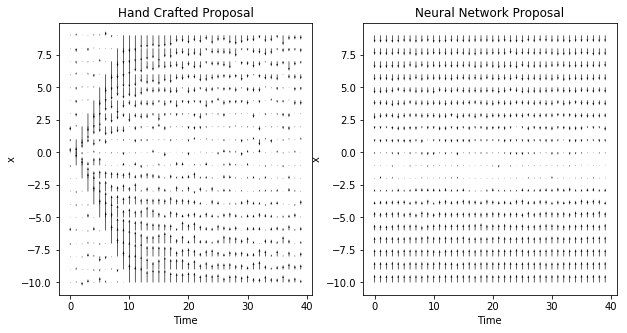

In [56]:
f = plt.figure(figsize=(10, 5))
ax = f.add_subplot(121)
ax.quiver(t, x, vector_grid_arrows_x, vector_grid_arrows_y_2)
ax.set_title('Hand Crafted Proposal')
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax = f.add_subplot(122)
ax.quiver(t, x, vector_grid_arrows_x, vector_grid_arrows_y_3)
ax.set_title('Neural Network Proposal')
ax.set_xlabel('Time')
ax.set_ylabel('x')

In [82]:
conduct_draws_nn(sp3, 4, 40/40)

-0.66